In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Muskan\\Desktop\\bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataframe
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Build a RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score      support
0              0.939208  0.964672  0.951770  7303.000000
1              0.649932  0.512299  0.572967   935.000000
accuracy       0.913328  0.913328  0.913328     0.913328
macro avg      0.794570  0.738486  0.762368  8238.000000
weighted avg   0.906376  0.913328  0.908776  8238.000000


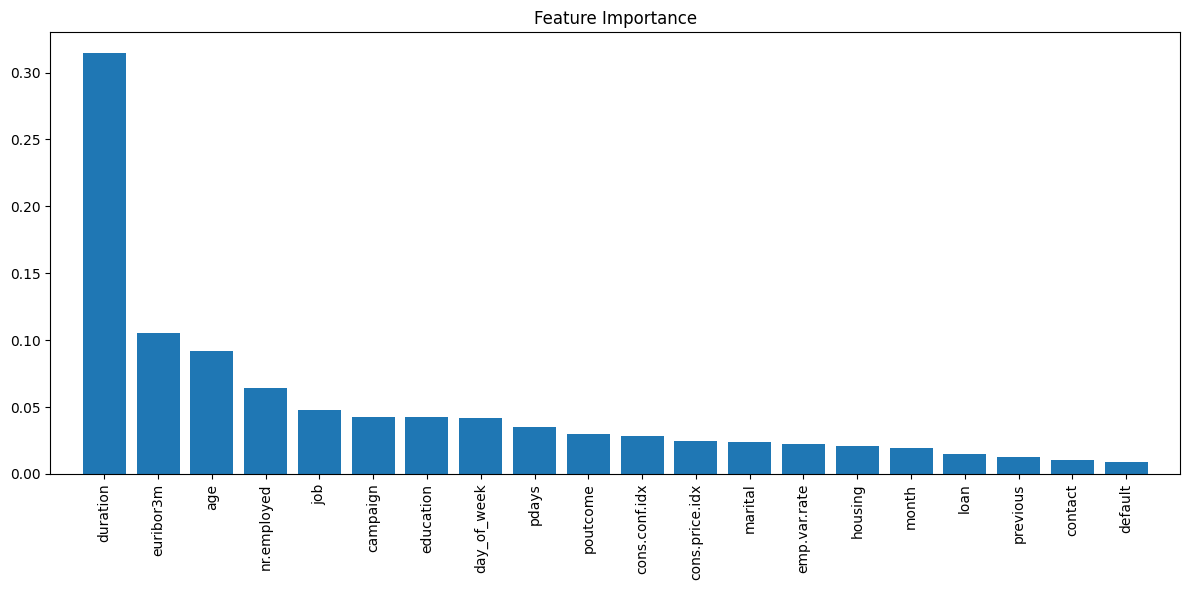

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [6]:
# Select observations #4 and #20
obs_4 = X_test.iloc[3]
obs_20 = X_test.iloc[19]

# Feature importance contributions for obs_4
contributions_4 = obs_4 * importances
print("Feature contributions for observation #4:")
print(contributions_4)

# Feature importance contributions for obs_20
contributions_20 = obs_20 * importances
print("Feature contributions for observation #20:")
print(contributions_20)

Feature contributions for observation #4:
age                 3.319987
job                 0.000000
marital             0.023601
education           0.126727
default             0.000000
housing             0.000000
loan                0.000000
contact             0.010024
month               0.077648
day_of_week         0.000000
duration          111.594221
campaign            0.169872
pdays              34.720491
previous            0.000000
poutcome            0.029701
emp.var.rate        0.030915
cons.price.idx      2.309771
cons.conf.idx      -1.172379
euribor3m           0.524485
nr.employed       335.988490
Name: 9403, dtype: float64
Feature contributions for observation #20:
age                 4.242205
job                 0.000000
marital             0.023601
education           0.253453
default             0.000000
housing             0.041042
loan                0.000000
contact             0.000000
month               0.019412
day_of_week         0.083070
duration          

In [8]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for the top 3 features
top_features = features[indices][:3]
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(clf, X_train, features=top_features, ax=ax)
plt.show()

In [9]:
print(report_df)

              precision    recall  f1-score      support
0              0.939208  0.964672  0.951770  7303.000000
1              0.649932  0.512299  0.572967   935.000000
accuracy       0.913328  0.913328  0.913328     0.913328
macro avg      0.794570  0.738486  0.762368  8238.000000
weighted avg   0.906376  0.913328  0.908776  8238.000000


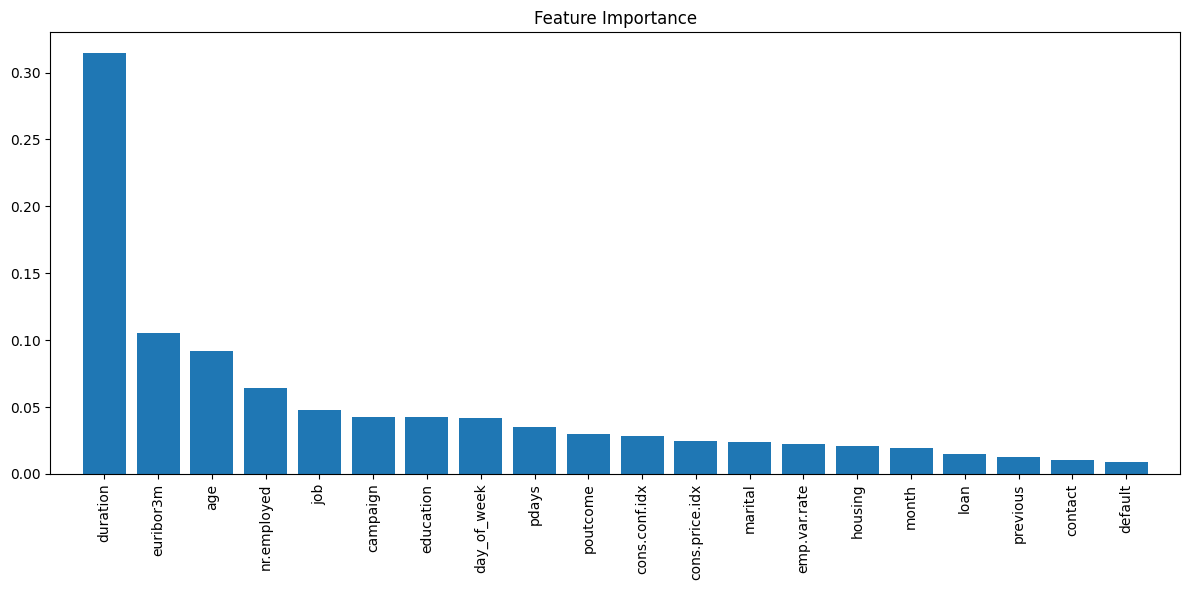

In [10]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [11]:
print("Feature contributions for observation #4:")
print(contributions_4)

Feature contributions for observation #4:
age                 3.319987
job                 0.000000
marital             0.023601
education           0.126727
default             0.000000
housing             0.000000
loan                0.000000
contact             0.010024
month               0.077648
day_of_week         0.000000
duration          111.594221
campaign            0.169872
pdays              34.720491
previous            0.000000
poutcome            0.029701
emp.var.rate        0.030915
cons.price.idx      2.309771
cons.conf.idx      -1.172379
euribor3m           0.524485
nr.employed       335.988490
Name: 9403, dtype: float64


In [12]:
print("Feature contributions for observation #20:")
print(contributions_20)

Feature contributions for observation #20:
age                 4.242205
job                 0.000000
marital             0.023601
education           0.253453
default             0.000000
housing             0.041042
loan                0.000000
contact             0.000000
month               0.019412
day_of_week         0.083070
duration          125.425618
campaign            0.042468
pdays              34.720491
previous            0.012613
poutcome            0.000000
emp.var.rate       -0.064039
cons.price.idx      2.254414
cons.conf.idx      -0.880687
euribor3m           0.092184
nr.employed       326.226501
Name: 37480, dtype: float64


In [13]:
top_features = features[indices][:3]
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(clf, X_train, features=top_features, ax=ax)
plt.show()